# Exercise A-2: Linear Mappings and Least Squares

1. A linear mapping: $\mathbb{R}^n \to \mathbb{R}^m$ is not always given in practice by explicitly specifying its coefficient matrix $A \in \mathbb{R}^{m \times n}$, but simply by a function procedure that returns the value $Ax \in \mathbb{R}^m$ for a given vector $x \in \mathbb{R}^n$. 

    Assume that such an evaluation procedure $x \to Ax$ is provided. 
    
    Use such a procedure to explicitly reconstruct the coefficient matrix $A$. Implement and test a concrete example (e.g., for $n = 4$).

2. Given data values $\{(t_j, \tilde{y}_j), \, j = 1, \ldots, m\}$, determine a quadratic function:

    $\alpha + \beta t + \gamma t^2$

    such that

    $\phi(\alpha, \beta, \gamma) = \dots$
    
    is minimized in the least-squares sense. Details are intentionally not specified here. 
    
    Your task is to implement this and solve a specific example. 
    
    This task is analogous to the problem of determining the "best fit line" (with only two parameters $\alpha, \beta$ to be determined). 
    
    Notation as in the lecture notes, particularly regarding the function $\phi$ to be minimized.

    This task leads to a linear $3 \times 3$ system (Gaussian normal equations, see the lecture notes). 
    
    Solve this system using an elimination method, e.g., by hand or using available numerical software, most easily Matlab (see Exercise 8).

3. Also, create a graphical visualization of your solution.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, init_printing, symbols, latex, lambdify
from sympy.abc import A
from IPython.display import display, Math

In [2]:
# Pre-requisites for pretty printing
init_printing()

In [3]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)
def format_dot_product(name, matrix1: Matrix, matrix2: Matrix):
    result = matrix1 * matrix2
    # Start LaTeX formatting
    latex_str = f"{name} = \\begin{{bmatrix}}\n"
    # Iterate over the result matrix to format each cell
    for i in range(result.rows):
        row_operations = []
        for j in range(result.cols):
            terms = []
            for k in range(matrix1.cols):
                terms.append(f"{matrix1[i, k]} \\cdot {matrix2[k, j] if matrix2.shape[1] > 1 else matrix2[k]}")
            operation = " + ".join(terms)
            row_operations.append(f"({operation})")
        latex_str += " & ".join(row_operations) + " \\\\\n"

    latex_str += "\\end{bmatrix} = " + latex(result)
    return latex_str

# Solution for 1)

A linear mapping: $\mathbb{R}^n \to \mathbb{R}^m$ is not always given in practice by explicitly specifying its coefficient matrix $A \in \mathbb{R}^{m \times n}$, but simply by a function procedure that returns the value $Ax \in \mathbb{R}^m$ for a given vector $x \in \mathbb{R}^n$. 

Assume that such an evaluation procedure $x \to Ax$ is provided. 

Use such a procedure to explicitly reconstruct the coefficient matrix $A$. Implement and test a concrete example (e.g., for $n = 4$).


$
\textbf{Step 1: Setup}
$

Assume we have a linear mapping
$
f: \mathbb{R}^n \to \mathbb{R}^m,
$
and that for any $ x \in \mathbb{R}^n $, we can compute $ f(x) \in \mathbb{R}^m $. 

We know $ f $ is linear, i.e.,
$
f(x+y) = f(x) + f(y), \quad f(\alpha x) = \alpha f(x), \quad \forall x,y \in \mathbb{R}^n,, \alpha \in \mathbb{R}.
$

There exists a matrix $ A \in \mathbb{R}^{m \times n} $ such that
$
f(x) = A x.
$

$
\textbf{Step 2: Standard Basis and Matrix Reconstruction}
$

Let $ { e_1, e_2, \dots, e_n } $ denote the standard basis of $\mathbb{R}^n$, where
$
e_j = (0, \dots, 0, 1, 0, \dots, 0)^T,
$
with the $1$ in the $j$-th position and zeros elsewhere.

Since $ f $ is linear and $ f(x) = A x $, we have
$
f(e_j) = A e_j.
$

But the matrix-vector product $ A e_j $ simply extracts the $ j $-th column of $ A $.

Thus, if we evaluate $ f $ at each of the standard basis vectors, we obtain all the columns of $ A $:
$
A = \bigl[ f(e_1) \mid f(e_2) \mid \cdots \mid f(e_n) \bigr].
$

$
\textbf{Step 3: Implementation Details}
$

1. Define a function that given $ x \in \mathbb{R}^n $, returns $ f(x) \in \mathbb{R}^m $.
2. Construct the standard basis vectors $ e_1, e_2, \dots, e_n $.
3. Evaluate $ f(e_j) $ for each $ j = 1, 2, \dots, n $.
4. Assemble the results into the columns of a matrix $ A $.

$
\textbf{Example: } n = 4, m = 3
$

For example, let
$
A = \begin{pmatrix}
1 & 2 & 3 & 4 \\
0 & -1 & 5 & 2 \\
2 & 1 & 0 & 7
\end{pmatrix}.
$

If the only access we have to $ A $ is through a function $ f(x) = A x $, then by evaluating:
$
f(e_1) = \begin{pmatrix} 1 \\ 0 \\ 2 \end{pmatrix}, \quad
f(e_2) = \begin{pmatrix} 2 \\ {-1} \\ 1 \end{pmatrix}, \quad
f(e_3) = \begin{pmatrix} 3 \\ 5 \\ 0 \end{pmatrix}, \quad
f(e_4) = \begin{pmatrix} 4 \\ 2 \\ 7 \end{pmatrix}.
$

Thus, reconstructing $ A $:
$
A = \bigl[f(e_1) \mid f(e_2) \mid f(e_3) \mid f(e_4)\bigr]
= \begin{pmatrix}
1 & 2 & 3 & 4 \\
0 & -1 & 5 & 2 \\
2 & 1 & 0 & 7
\end{pmatrix}.
$


In [ ]:
# Define dimensions
m, n = 3, 4  # for example

# Define a specific matrix A (which we pretend we do not know explicitly in practice)
A = Matrix([
    [1,   2,  3,  4],
    [0,  -1,  5,  2],
    [2,   1,  0,  7]
])

# Define the linear mapping f: R^n -> R^m as f(x) = A*x
def f(x):
    # x is assumed to be an n-dimensional column vector (Sympy Matrix)
    return A*x

# Display the original A for reference
display(Math(r"A = " + latex(A) + r"\text{(unknown matrix)}"))

# Step-by-step reconstruction:
# 1. Construct standard basis vectors e_1, e_2, ..., e_n in R^n
e_vectors = []
e_vectors_str = []
for j in range(n):
    # Create a vector of length n with a 1 in the j-th position and 0 elsewhere
    e = Matrix([1 if i == j else 0 for i in range(n)])
    e_vectors.append(e)
    e_vectors_str.append("e_{j} = " + latex(e))
display(Math(latex(Identity(4)) + r"= " + latex(Matrix.eye(4)) + r"\Rightarrow " + ",".join(e_vectors_str)))

# 2. Apply f to each standard basis vector to get columns of A
reconstructed_cols = []
for j, e in enumerate(e_vectors, start=1):
    fe = f(e)
    # Display the calculation: f(e_j)
    display(Math(r"f(e_{%d}) = A e_{%d} = " % (j, j) + latex(fe)))
    reconstructed_cols.append(fe)

# 3. Form the reconstructed matrix
A_reconstructed = Matrix.hstack(*reconstructed_cols)

# Display the reconstructed matrix
display(Math(r"A = " + latex(A_reconstructed) + r"\text{(reconstructed)}"))

<>:28: SyntaxWarning: invalid escape sequence '\R'
<>:28: SyntaxWarning: invalid escape sequence '\R'
C:\Users\rini\AppData\Local\Temp\ipykernel_53428\717103957.py:28: SyntaxWarning: invalid escape sequence '\R'
  display(Math(latex(Identity(4)) + r"= " + latex(Matrix.eye(4)) + "\Rightarrow " + ",".join(e_vectors_str)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Solution for 2)

Given data values $\{(t_j, \tilde{y}_j), \, j = 1, \ldots, m\}$, determine a quadratic function:

$\alpha + \beta t + \gamma t^2$

such that

$\phi(\alpha, \beta, \gamma) = \dots$

is minimized in the least-squares sense. Details are intentionally not specified here. 

Your task is to implement this and solve a specific example. 

This task is analogous to the problem of determining the "best fit line" (with only two parameters $\alpha, \beta$ to be determined). 

Notation as in the lecture notes, particularly regarding the function $\phi$ to be minimized.

This task leads to a linear $3 \times 3$ system (Gaussian normal equations, see the lecture notes). 

Solve this system using an elimination method, e.g., by hand or using available numerical software, most easily Matlab (see Exercise 8).

$
\textbf{Step 1: Problem Setup}
$

We are given data points $(t_j, \tilde{y}_j)$ for $j = 1, \ldots, m$.

We seek parameters $\alpha, \beta, \gamma \in \mathbb{R}$ such that the quadratic model
$$
y(t) = \alpha + \beta t + \gamma t^2
$$
best fits the data in a least-squares sense. This means minimizing the objective function:
$$
\phi(\alpha, \beta, \gamma) = \sum_{j=1}^m \bigl(\tilde{y}_j - (\alpha + \beta t_j + \gamma t_j^2)\bigr)^2.
$$

$
\textbf{Step 2: Matrix Representation}
$

The quadratic model for the $j$-th data point can be expressed as:
$$
\tilde{y}_j = \alpha + \beta t_j + \gamma t_j^2.
$$

Writing this for all data points, we obtain the system of equations:
$$
\begin{aligned}
\tilde{y}_1 &= \alpha + \beta t_1 + \gamma t_1^2, \\
\tilde{y}_2 &= \alpha + \beta t_2 + \gamma t_2^2, \\
&\vdots \\
\tilde{y}_m &= \alpha + \beta t_m + \gamma t_m^2.
\end{aligned}
$$

Rewriting this system in matrix form, we define:
$$
A =
\begin{pmatrix}
1 & t_1 & t_1^2 \\
1 & t_2 & t_2^2 \\
\vdots & \vdots & \vdots \\
1 & t_m & t_m^2
\end{pmatrix} \in \mathbb{R}^{m \times 3},
\quad
x =
\begin{pmatrix}
\alpha \\
\beta \\
\gamma
\end{pmatrix},
\quad
\tilde{y} =
\begin{pmatrix}
\tilde{y}_1 \\
\tilde{y}_2 \\
\vdots \\
\tilde{y}_m
\end{pmatrix}.
$$

This gives the linear system:
$$
A x = \tilde{y}.
$$

$
\textbf{Step 3: Least Squares Solution}
$

To find the best-fit parameters $\alpha, \beta, \gamma$, we minimize the residual:
$$
r = \tilde{y} - A x,
$$
and the least-squares objective function:
$$
\phi(x) = \|r\|^2 = \| \tilde{y} - A x \|^2.
$$

The solution is obtained by solving the **normal equations**:
$$
A^T A x = A^T \tilde{y}.
$$

This is a system of three linear equations in three unknowns, which can be solved using standard methods such as Gaussian elimination.

$
\textbf{Step 4: Normal Equations in Matrix Form}
$

In matrix form, let:
$$
S_0 = \sum_{j=1}^m 1 = m,\quad
S_1 = \sum_{j=1}^m t_j,\quad
S_2 = \sum_{j=1}^m t_j^2,\quad
S_3 = \sum_{j=1}^m t_j^3,\quad
S_4 = \sum_{j=1}^m t_j^4,
$$

and
$$
T_0 = \sum_{j=1}^m \tilde{y}*j,\quad
T_1 = \sum*{j=1}^m t_j \tilde{y}*j,\quad
T_2 = \sum*{j=1}^m t_j^2 \tilde{y}_j.
$$

The matrix $A^T A$ is:
$$
A^T A =
\begin{pmatrix}
S_0 & S_1 & S_2 \\
S_1 & S_2 & S_3 \\
S_2 & S_3 & S_4
\end{pmatrix}
=
\begin{pmatrix}
m & \sum_{j=1}^m t_j & \sum_{j=1}^m t_j^2 \\
\sum_{j=1}^m t_j & \sum_{j=1}^m t_j^2 & \sum_{j=1}^m t_j^3 \\
\sum_{j=1}^m t_j^2 & \sum_{j=1}^m t_j^3 & \sum_{j=1}^m t_j^4
\end{pmatrix}.
$$

The right-hand side $A^T \tilde{y}$ is:
$$
A^T \tilde{y} =
\begin{pmatrix}
T_0 \\ T_1 \\ T_2
\end{pmatrix}
=
\begin{pmatrix}
\sum_{j=1}^m \tilde{y}_j \\
\sum_{j=1}^m t_j \tilde{y}_j \\
\sum_{j=1}^m t_j^2 \tilde{y}_j
\end{pmatrix}.
$$

This gives the normal equations in full:
$$
\begin{pmatrix}
S_0 & S_1 & S_2 \\
S_1 & S_2 & S_3 \\
S_2 & S_3 & S_4
\end{pmatrix}
\begin{pmatrix}
\alpha \\ \beta \\ \gamma
\end{pmatrix}
=
\begin{pmatrix}
T_0 \\ T_1 \\ T_2
\end{pmatrix}
\Rightarrow
\begin{pmatrix}
\sum_{j=1}^m 1 & \sum_{j=1}^m t_j & \sum_{j=1}^m t_j^2 \\
\sum_{j=1}^m t_j & \sum_{j=1}^m t_j^2 & \sum_{j=1}^m t_j^3 \\
\sum_{j=1}^m t_j^2 & \sum_{j=1}^m t_j^3 & \sum_{j=1}^m t_j^4
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta \\
\gamma
\end{pmatrix}
=
\begin{pmatrix}
\sum_{j=1}^m \tilde{y}_j \\
\sum_{j=1}^m t_j \tilde{y}_j \\
\sum_{j=1}^m t_j^2 \tilde{y}_j
\end{pmatrix}.
$$

$
\textbf{Step 5: Solution}
$

By solving this system, we obtain the parameters $\alpha, \beta, \gamma$ that best fit the given data points in the least-squares sense.

----

# Solution for 2) (continued)

Moving on, we will look at the implementation of the above formula in Python, given the data points $(t_j, \tilde{y}_j)$.

In [5]:
# Given data points (t_j, y_j)
data = [(0,1),(1,2),(2,0),(3,2),(4,5)]

# Extract t_j and y_j arrays
t_vals = [p[0] for p in data]
y_vals = [p[1] for p in data]

# Compute sums
m = len(data)
S0 = m
S1 = sum(t_vals)
S2 = sum(t**2 for t in t_vals)
S3 = sum(t**3 for t in t_vals)
S4 = sum(t**4 for t in t_vals)

T0 = sum(y_vals)
T1 = sum(t*y for t,y in data)
T2 = sum((t**2)*y for t,y in data)

# Construct the normal equation system
S_0, S_1, S_2, S_3, S_4 = symbols('S_0 S_1 S_2 S_3 S_4', real=True)
T_0, T_1, T_2 = symbols('T_0 T_1 T_2', real=True)
A_sym = Matrix([
    [S_0, S_1, S_2],
    [S_1, S_2, S_3],
    [S_2, S_3, S_4]
])
b_sym = Matrix([T_0, T_1, T_2])
A = Matrix([
    [S0, S1, S2],
    [S1, S2, S3],
    [S2, S3, S4]
])
b = Matrix([T0, T1, T2])
A_augmented = A.row_join(b)
# Solve the system A*[alpha;beta;gamma]=b
alpha, beta, gamma = symbols('alpha beta gamma', real=True)
unknowns = Matrix([alpha, beta, gamma])

# Display the normal equations and solution in LaTeX
display(Math(r"\text{Data: }" + latex(Matrix(data))))
display(Math(r"\text{Sums: }" + latex(A_sym) + "=" + latex(A) + r"\text{ and }" + latex(b_sym) + "=" + latex(b)))
display(Math(r"\text{Normal Equations: }" + 
             latex(A) + r"\cdot" + latex(unknowns) + "=" + latex(b)))
display(Math(r"A^T A\text{ augmented with }A^T\tilde{y}:" + latex(A_augmented)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Library solution
expected_solution = A.LUsolve(b)
alpha_sol, beta_sol, gamma_sol = expected_solution
display(Math(r"\text{Expected Solution: }" + latex(unknowns) + "=" + latex(expected_solution)))

<IPython.core.display.Math object>

In [7]:
def print_matrix(mat_before, mat_after, operation="", calculations="", explanation=""):
    """Display the matrix with detailed operation messages in LaTeX format."""
    msg = r" \begin{aligned}"
    if explanation:
        msg += r"& \text" + f"{{{explanation}}}" + r" \\"
    msg += r"A &= " + latex(mat_before) + r"\Rightarrow" + latex(mat_after) + r"\\"
    if operation:
        msg += r" \text{Operation } & " + operation + r" \\"
    if calculations:
        msg += r" \text{Calculation: } & " + calculations + r" \\"
    msg += r" \end{aligned} "
    display(Math(msg))

def swap_rows_for_pivot(mat, pivot_row, pivot_col):
    """
    Ensure the pivot at (pivot_row, pivot_col) is nonzero by swapping rows if needed.

    Returns True if a swap was made or pivot was found, False if no pivot found.
    """
    mat_before = mat.copy()
    if mat[pivot_row, pivot_col] == 0:
        for i in range(pivot_row + 1, mat.rows):
            if mat[i, pivot_col] != 0:
                mat.row_swap(pivot_row, i)
                print_matrix(mat_before, mat, f"R_{pivot_row + 1} \\leftrightarrow R_{i + 1}", 
                             f"Swap rows {pivot_row + 1} and {i + 1}", 
                             "Swapping rows to ensure a nonzero pivot.")
                return True
        return False
    return True

def normalize_pivot_row(mat, pivot_row, pivot_col):
    """Normalize the pivot row so that the pivot element becomes 1."""
    pivot = mat[pivot_row, pivot_col]
    mat_before = mat.copy()
    if pivot != 0:
        calculations = f"R_{pivot_row + 1} : " r"\frac{R_" + f"{pivot_row + 1}" + r"}" + r"{" +latex(pivot) + r"}"
        cell_calculations = [f"\\frac{{{latex(cell)}}}{{{pivot}}} = {latex(cell / pivot)}" for cell in mat.row(pivot_row)]
        cell_calculations = "; ".join(cell_calculations)
        mat.row_op(pivot_row, lambda v, j: v / pivot)
        print_matrix(mat_before, mat, calculations, 
                     cell_calculations, 
                     "Normalize pivot row.")
    else:
        raise ValueError("Pivot is zero; cannot normalize.")

def eliminate_column_entries(mat, pivot_row, pivot_col, eliminate_above=False):
    """
    Eliminate entries in the pivot_col for all rows below (or above) the pivot_row.
    If eliminate_above=False, eliminates entries in rows below pivot_row.
    If eliminate_above=True, eliminates entries in rows above pivot_row.
    """
    direction = "above" if eliminate_above else "below"
    row_range = range(pivot_row - 1, -1, -1) if eliminate_above else range(pivot_row + 1, mat.rows)
    mat_before = mat.copy()
    for i in row_range:
        factor = mat[i, pivot_col]
        original_row = mat.row(i).copy()
        mat.row_op(i, lambda v, j: v - factor * mat[pivot_row, j])
        modified_row = mat.row(i)
        calculations = f"R_{i + 1} : (R_{i + 1} - ({latex(factor)} \\cdot R_{pivot_row + 1})"
        
        cell_calculations = []
        for j in range(mat.cols):
            cell_calculations.append(f"{latex(original_row[j])} - {factor} \\cdot {latex(mat[pivot_row, j])} = {latex(modified_row[j])}")
        
        cell_explanation = "; ".join([f"({calc})" for calc in cell_calculations])
        print_matrix(mat_before, mat, calculations, cell_explanation, f"Eliminating entries {direction} the pivot.")
        
def reduce_to_rref(mat):
    """Reduce the augmented matrix mat to RREF (reduced-row-echelon-form) by:
    
    1. Finding pivots and swapping rows if necessary.
    2. Normalizing pivot rows.
    3. Eliminating below and above pivots."""
    num_pivots = min(mat.rows, mat.cols - 1)  # for augmented matrix, last col is b

    # Forward elimination
    for pivot_index in range(num_pivots):
        # Ensure a nonzero pivot
        if not swap_rows_for_pivot(mat, pivot_index, pivot_index):
            raise ValueError("No suitable pivot found. System may be singular.")
        
        # Normalize the pivot row
        normalize_pivot_row(mat, pivot_index, pivot_index)
        
        # Eliminate below the pivot
        eliminate_column_entries(mat, pivot_index, pivot_index, eliminate_above=False)
    
    # Back substitution (eliminate above pivots)
    for pivot_index in range(num_pivots - 1, -1, -1):
        eliminate_column_entries(mat, pivot_index, pivot_index, eliminate_above=True)

    return mat

In [8]:
# Perform the Gaussian elimination process
rref = reduce_to_rref(A_augmented.copy())

# Extract the solution: [alpha; beta; gamma]
alpha_sol = rref[0, 3]
beta_sol = rref[1, 3]
gamma_sol = rref[2, 3]
display(Math(r"\Rightarrow \alpha = " + latex(alpha_sol) + f"\\approx{alpha_sol.evalf()}" 
             + r", \quad \beta = " + latex(beta_sol) + f"\\approx{beta_sol.evalf()}" 
             + r", \quad \gamma = " + latex(gamma_sol) + f"\\approx{gamma_sol.evalf()}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Solution for 3)

Also, create a graphical visualization of your solution.

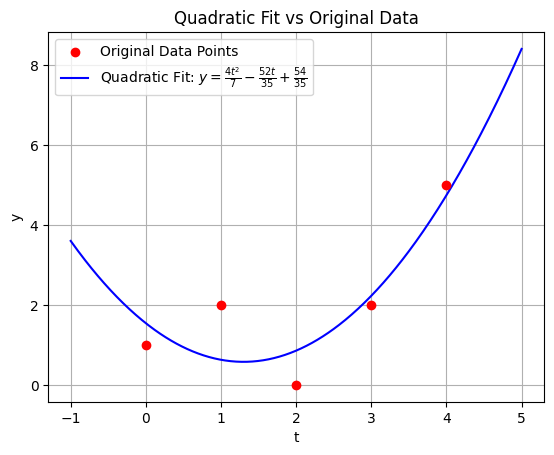

In [9]:
# Define the quadratic function using the solved coefficients
t = symbols('t')
quadratic_func = alpha_sol + beta_sol * t + gamma_sol * t**2

# Convert the sympy expression to a Python function for plotting
quadratic_func_lambdified = lambdify(t, quadratic_func, 'numpy')

# Generate data for the quadratic function
t_vals_plot = np.linspace(min(t_vals) - 1, max(t_vals) + 1, 500)  # Create a range for t
y_vals_plot = quadratic_func_lambdified(t_vals_plot)  # Evaluate the quadratic function

# Plot the original data points
plt.scatter(t_vals, y_vals, color='red', label='Original Data Points', zorder=5)

# Plot the quadratic function
plt.plot(t_vals_plot, y_vals_plot, color='blue', label=f'Quadratic Fit: $y = {latex(quadratic_func)}$')

# Add labels, legend, and title
plt.xlabel('t')
plt.ylabel('y')
plt.title('Quadratic Fit vs Original Data')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
